<a href="https://colab.research.google.com/github/rajivprao/ml/blob/main/Insurance_Premium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today we will explore dataset dedicated to cost of treatment of different patients.

The cost of treatment depends on many factors : Diagnosis, type of clinic, city of residence, age and so on.

We have no data on the diagnosis of patients. But we have other information that can help us make prediction about health of patients and practice regression analysis.

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [146]:
#import data
data = pd.read_csv('/content/insurance.csv')

In [147]:
data.shape

(1338, 7)

In [148]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [149]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [150]:
# find missing data
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [151]:
# understand the categorical columns
for cols in data.columns:
  if data[cols].dtype == 'object':
    print(cols,':',data[cols].unique())

# we can ignore region in this dataset

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


In [152]:
# mapping the categorical columns
data['smoker'] = data['smoker'].map({'yes':1,'no':0})
data['sex'] = data['sex'].map({'male':1,'female':0})

In [153]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [154]:
# finding correlation of all the columns wrt charges
data.corr(numeric_only=True)['charges'].sort_values()

,charges
sex,0.057292
children,0.067998
bmi,0.198341
age,0.299008
smoker,0.787251
charges,1.000000


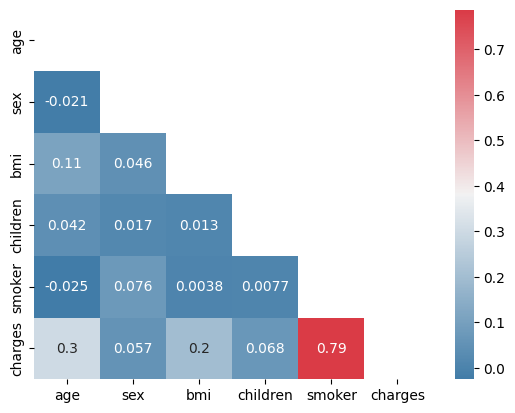

In [155]:
# heatmap for correlation
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True,mask=np.triu(corr),
            cmap=sns.diverging_palette(240,10,as_cmap=True)) # trimming the upperhalf as it is identical
plt.show()

In [156]:
# There is a string correlation only with patients who are Smokers
# The expectation was there is a string correlation between bmi and charges

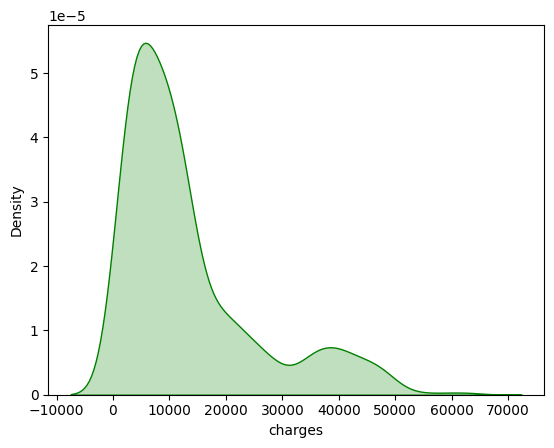

In [157]:
# understanding target column
sns.kdeplot(data['charges'],fill=True,color='green')
plt.show()

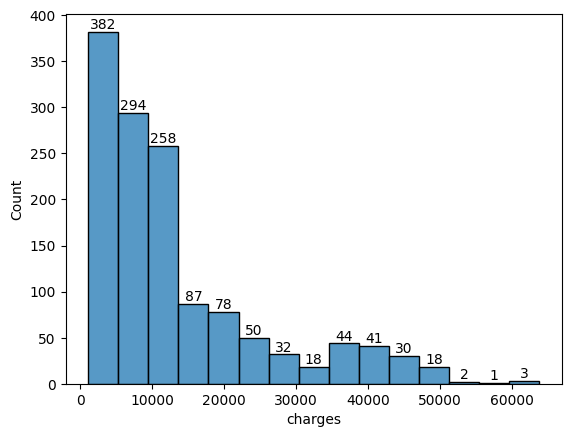

In [158]:
# histogram
ax = sns.histplot(data['charges'],bins=15)
ax.bar_label(ax.containers[0])
plt.show()

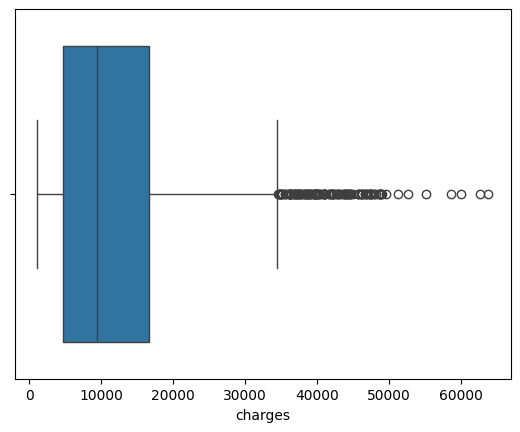

In [159]:
# outlier plot
sns.boxplot(data['charges'],orient='h')
plt.show()

# This is right skewed. Use box cox transformation to make the right skewed to normal distribution

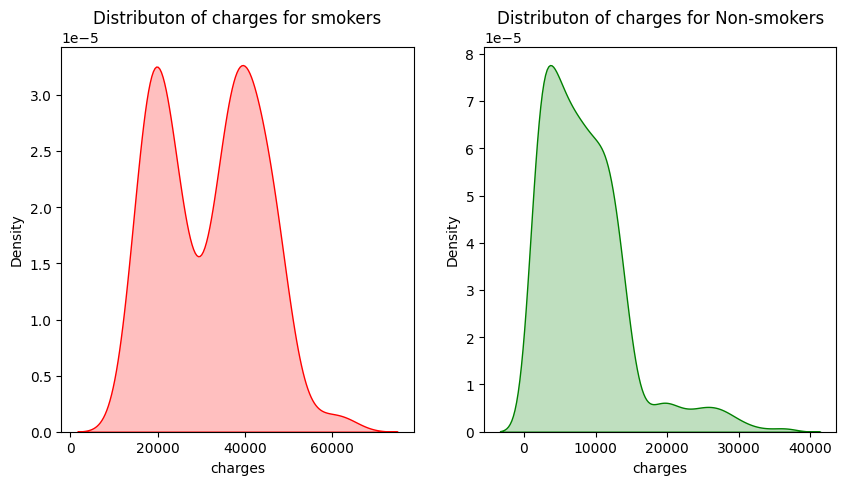

In [160]:
# Distributon of data for smoker column

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(121) # one row, 2 columns, 1st plot
sns.kdeplot(data[data['smoker']==1]['charges'],color='red',fill=True)
ax.set_title('Distributon of charges for smokers')

ax = fig.add_subplot(122) # one row, 2 columns, 2nd plot
sns.kdeplot(data[data['smoker']==0]['charges'],color='green',fill=True)
ax.set_title('Distributon of charges for Non-smokers')

plt.show()

In [161]:
# Smoking patients tends to spend more on treatments

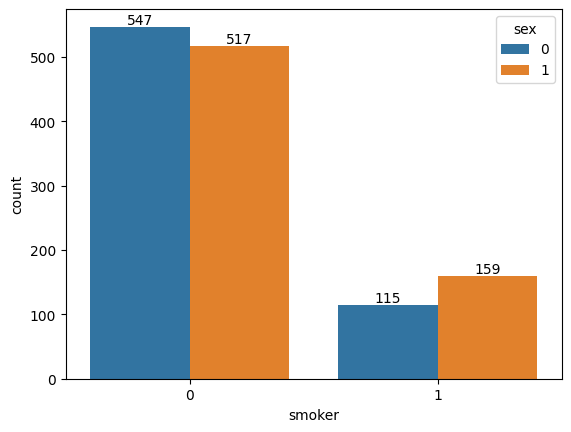

In [162]:
# Count of smokers and non-smokers wrt gender
ax = sns.countplot(x='smoker',data=data, hue='sex')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

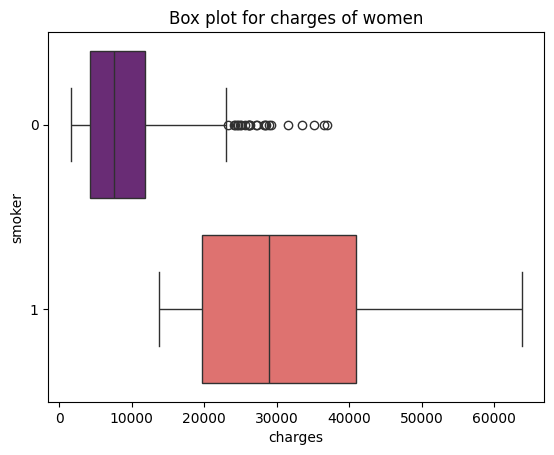

In [163]:
# box plot to understand female wrt smoking habit
plt.title("Box plot for charges of women")
sns.boxplot(y='smoker',x='charges',data=data[data['sex']==0],orient='h',palette='magma')
plt.show()

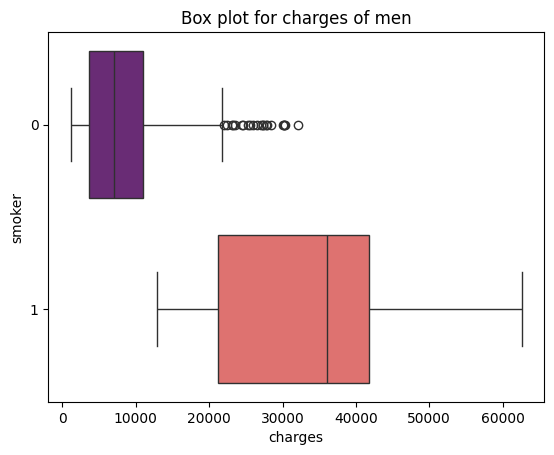

In [164]:
# box plot to understand male wrt smoking habit
plt.title("Box plot for charges of men")
sns.boxplot(y='smoker',x='charges',data=data[data['sex']==1],orient='h',palette='magma')
plt.show()

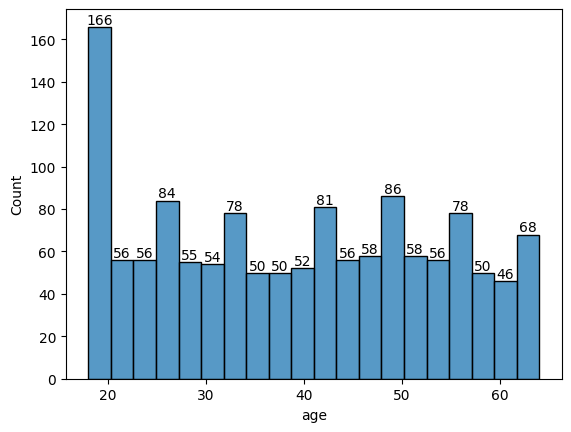

In [165]:
# understand the age of patients
ax = sns.histplot(data['age'],bins=20)
ax.bar_label(ax.containers[0])
plt.show()

In [166]:
data[data['age'] <= 20]['age'].value_counts()

,count
age,
18,69
19,68
20,29


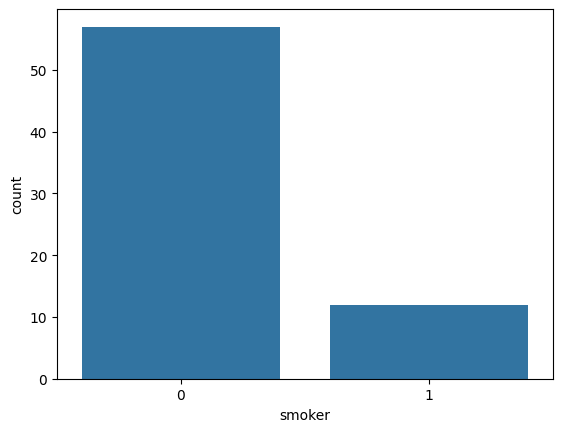

In [167]:
# Understanding smoking habit of people with age 18
sns.countplot(x='smoker',data=data[data['age']==18])
plt.show()

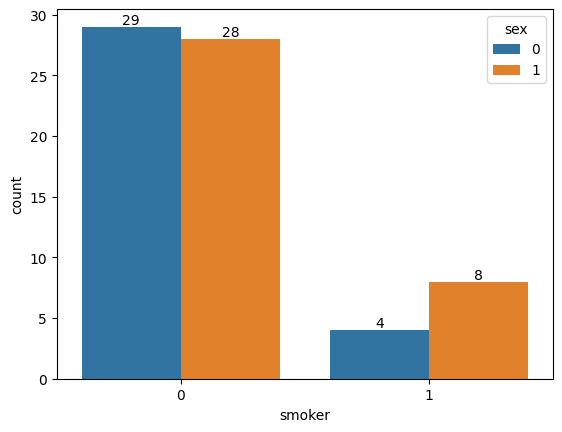

In [168]:
# Understanding smoking habit of people with age 18
ax = sns.countplot(x='smoker',data=data[data['age']==18],hue='sex')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [169]:
#understanding the maximum age of the person
data[data['age'] == data['age'].max()]

,age,sex,bmi,children,smoker,region,charges
62,64,1,24.700,1,0,northwest,30166.61817
94,64,0,31.300,2,1,southwest,47291.05500
199,64,0,39.330,0,0,northeast,14901.51670
328,64,0,33.800,1,1,southwest,47928.03000
335,64,1,34.500,0,0,southwest,13822.80300
378,64,0,30.115,3,0,northwest,16455.70785
398,64,1,25.600,2,0,southwest,14988.43200
402,64,0,32.965,0,0,northwest,14692.66935
418,64,1,39.160,1,0,southeast,14418.28040
420,64,1,33.880,0,1,southeast,46889.26120


In [170]:
#understanding the count of people with maximum age
data[data['age'] == data['age'].max()]['age'].value_counts()

,count
age,
64,22


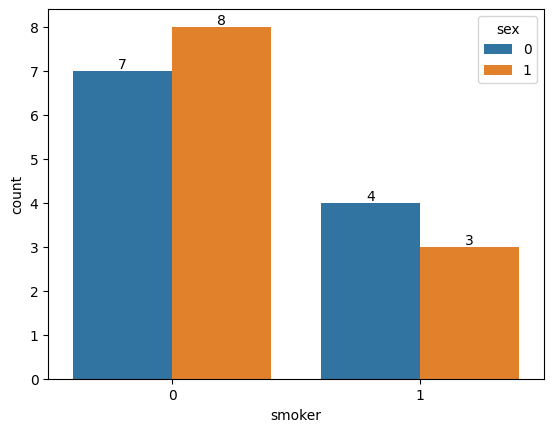

In [171]:
# Understanding smoking habit of people with max age
ax = sns.countplot(x='smoker',data=data[data['age']== data['age'].max()],hue='sex')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

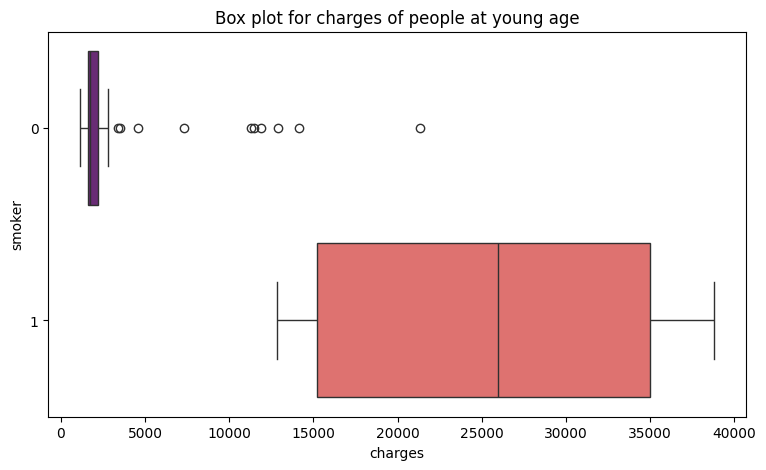

In [172]:
# does smoking habit has any affect on treatment cost
plt.figure(figsize=(9,5))
plt.title('Box plot for charges of people at young age')
sns.boxplot(y='smoker',x='charges',data=data[data['age']==18],orient='h',palette='magma')
plt.show()

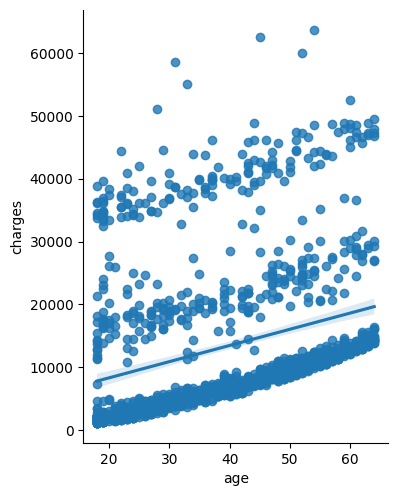

In [173]:
# Age vs Charges
sns.pairplot(x_vars='age',y_vars='charges',data=data,kind='reg',height=5,aspect=0.8)
plt.show()

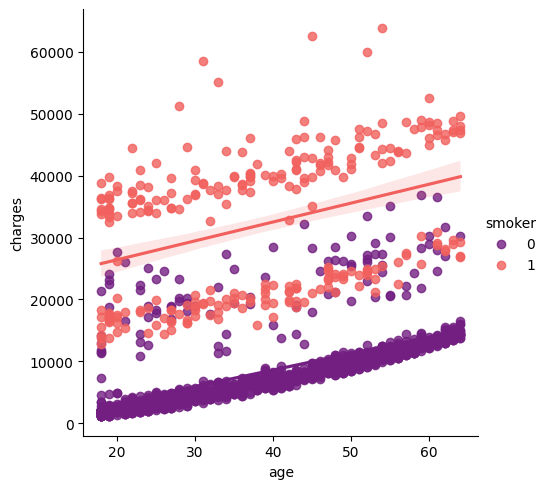

In [174]:
# smoke vs non-smoker charges
sns.lmplot(x='age',y='charges',hue='smoker',data=data,palette='magma')
plt.show()

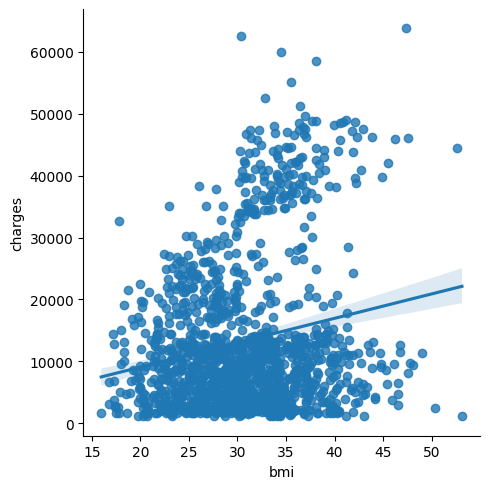

In [175]:
# Correlation of BMI wrt charges
sns.lmplot(x='bmi',y='charges',data=data,palette='magma')
plt.show()

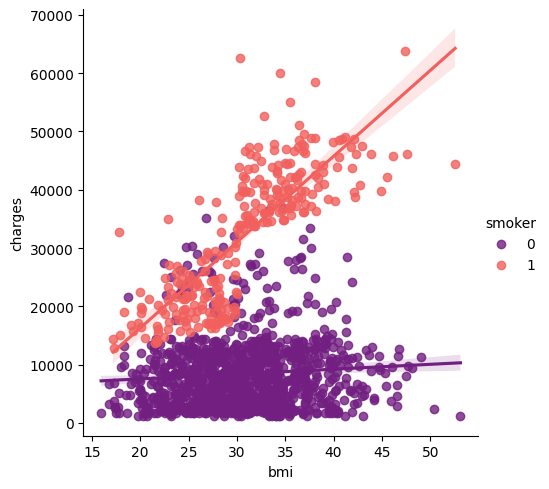

In [176]:
# Correlation of BMI wrt charges and smoking habit
sns.lmplot(x='bmi',y='charges',hue='smoker',data=data,palette='magma')
plt.show()

Patients who are smokers and having BMI > 30 (Obese) pays high amount

In [177]:
# Dependency split
x = data.drop(['region','charges'], axis=1)
y = data[['charges']]

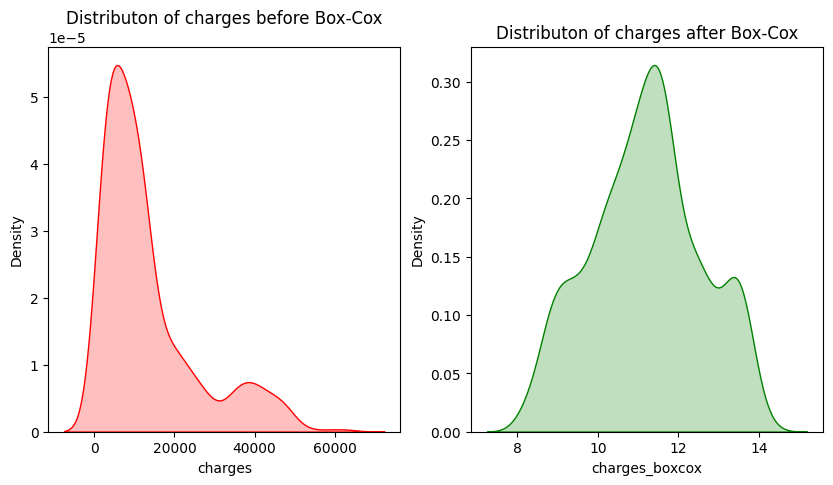

In [178]:
# Understanding the target column
fig = plt.figure(figsize=(10,5))

# plot before boxcox
ax = fig.add_subplot(121) # one row, 2 columns, 1st plot
sns.kdeplot(y['charges'],color='red',fill=True,ax=ax)
ax.set_title('Distributon of charges before Box-Cox')

# Applying Boxcox

from scipy.stats import boxcox
y['charges_boxcox'], lmda = boxcox(y['charges'])

# plot of boxcox

ax = fig.add_subplot(122) # one row, 2 columns, 2nd plot
sns.kdeplot(y['charges_boxcox'],color='green',fill=True,ax=ax)
ax.set_title('Distributon of charges after Box-Cox')

plt.show()

In [179]:
# optional code
from scipy.special import inv_boxcox

y['transformed'] = inv_boxcox(y['charges_boxcox'],lmda)

In [180]:
y

,charges,charges_boxcox,transformed
0,16884.92400,12.128980,16884.92400
1,1725.55230,8.808597,1725.55230
2,4449.46200,10.147521,4449.46200
3,21984.47061,12.534951,21984.47061
4,3866.85520,9.945637,3866.85520
...,...,...,...
1333,10600.54830,11.424197,10600.54830
1334,2205.98080,9.150491,2205.98080
1335,1629.83350,8.729683,1629.83350
1336,2007.94500,9.019132,2007.94500


Expore SciPy Power Transformer and

geek for geeks

In [182]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y['charges_boxcox'], test_size=0.2, random_state=42)

In [185]:
# Simple Linear Regression
import statsmodels.api as sm

#fit the data
x_train_data = sm.add_constant(x_train)
mlr_model = sm.OLS(y_train, x_train_data).fit()

#summary
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:         charges_boxcox   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     663.3
Date:                Wed, 06 Aug 2025   Prob (F-statistic):          4.94e-324
Time:                        16:39:49   Log-Likelihood:                -1085.6
No. Observations:                1070   AIC:                             2183.
Df Residuals:                    1064   BIC:                             2213.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1211      0.118     68.706      0.0

# Statistical insignificance - if p > 0.05

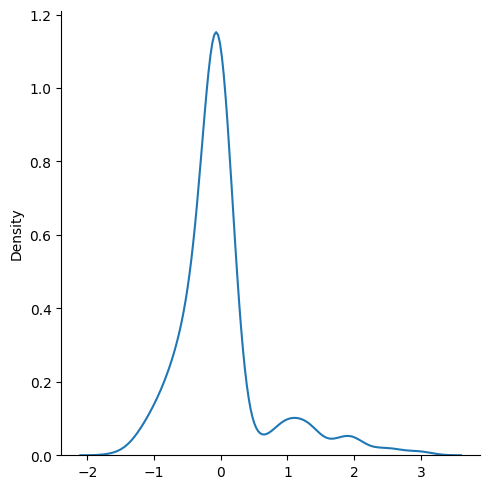

In [188]:
# Residual calculation
y_train_predict = mlr_model.predict(x_train_data)
res = y_train - y_train_predict

# Residual Plot
sns.displot(res, kind='kde')
plt.show()

In [191]:
# Test Prediction

# add Constant
x_test_data = sm.add_constant(x_test)

# prediction
y_test_pred = mlr_model.predict(x_test_data)

# testing accuracy
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test,y_test_pred))

0.8009882517855219


# # linear equation
# there are predicted values
   
y = age * 0.0501 + sex * -0.1017 + bmi *      0.0180 + children * 0.1332 + smoker * 2360      

# This is picked from OLS Regression Results

In [196]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor as rfr

rfr_model = rfr(n_estimators=50, criterion='squared_error', random_state=42, n_jobs=-1)
rfr_model.fit(x_train,y_train)
x_train_pred = rfr_model.predict(x_train)
x_test_pred = rfr_model.predict(x_test)

# metrics
print('Training Score', r2_score(y_train,x_train_pred))
print('Testing Score', r2_score(y_test,x_test_pred))

Training Score 0.9638565064471866
Testing Score 0.8317712735332571


96 and 83 - Over fitting problem

To avoid overfitting, use hyper parameter tuning